In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [2]:
#loading dataset
iris = load_iris()

#printing featue names
print('features: %s'%iris['feature_names'])

#printing species of iris
print('target categories: %s'%iris['target_names'])

#iris data shape
print("Shape of data: {}".format(iris['data'].shape))

features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target categories: ['setosa' 'versicolor' 'virginica']
Shape of data: (150, 4)


In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#iris_df.head()
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

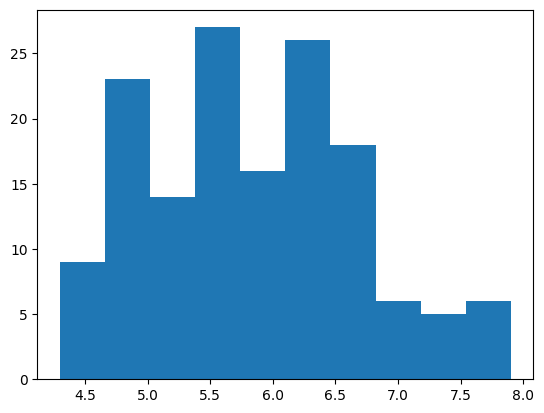

In [6]:
plt.hist(iris_df['sepal length (cm)'])


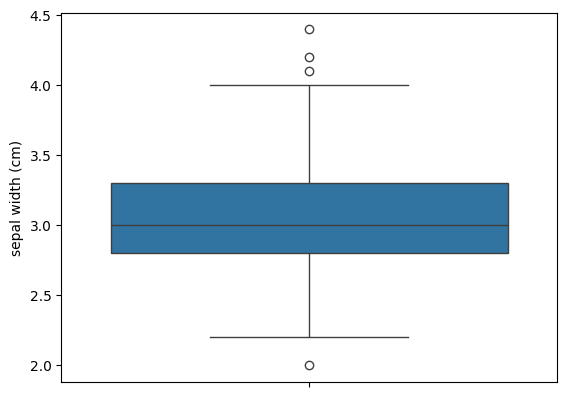

In [7]:
import seaborn as sb
sb.boxplot(y=iris_df['sepal width (cm)'],linewidth=1)
plt.show()

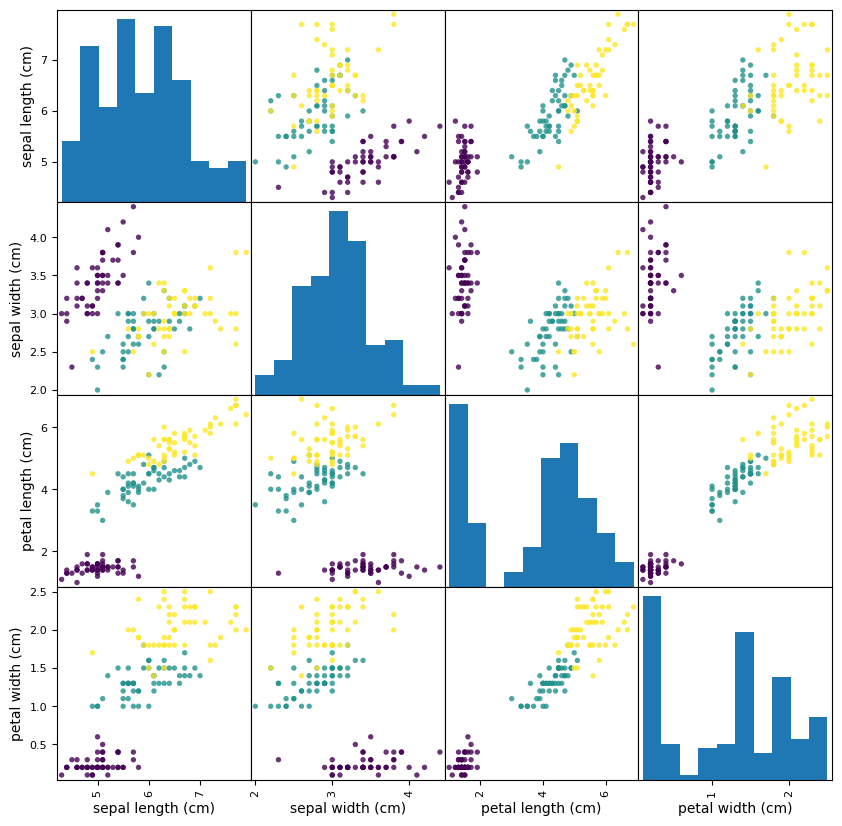

In [8]:
scatter_matrix(iris_df, c=iris['target'],figsize=(10, 10),marker='o', s=15,alpha=.8)
plt.show()

<Axes: >

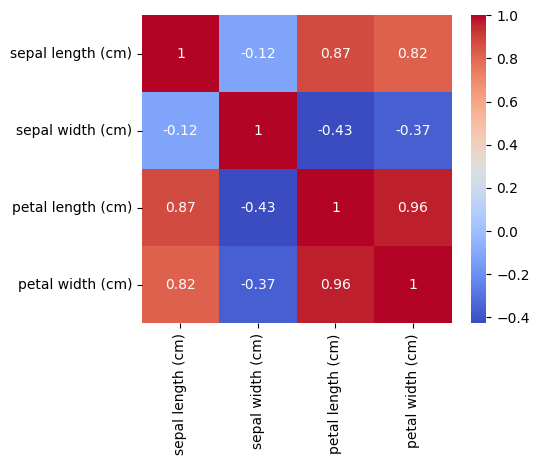

In [9]:
corr = iris_df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sb.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [10]:
X, y = iris.data, iris.target

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=141)
print(y_test)


tensor([0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2,
        1, 1, 1, 2, 0, 1])


In [11]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size,output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        return x


In [12]:
# Hyperparameters
input_size = 4  # Number of features in Iris dataset
hidden_size = 10
output_size = 3  # Number of classes

# Create the model
model = MLP(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


<ipython-input-11-5e75318d80b6>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


Epoch [10/1000], Loss: 0.9588
Epoch [20/1000], Loss: 0.8495
Epoch [30/1000], Loss: 0.7813
Epoch [40/1000], Loss: 0.7283
Epoch [50/1000], Loss: 0.6855
Epoch [60/1000], Loss: 0.6515
Epoch [70/1000], Loss: 0.6287
Epoch [80/1000], Loss: 0.6144
Epoch [90/1000], Loss: 0.6053
Epoch [100/1000], Loss: 0.5991
Epoch [110/1000], Loss: 0.5948
Epoch [120/1000], Loss: 0.5916
Epoch [130/1000], Loss: 0.5891
Epoch [140/1000], Loss: 0.5871
Epoch [150/1000], Loss: 0.5855
Epoch [160/1000], Loss: 0.5841
Epoch [170/1000], Loss: 0.5829
Epoch [180/1000], Loss: 0.5819
Epoch [190/1000], Loss: 0.5810
Epoch [200/1000], Loss: 0.5802
Epoch [210/1000], Loss: 0.5794
Epoch [220/1000], Loss: 0.5788
Epoch [230/1000], Loss: 0.5782
Epoch [240/1000], Loss: 0.5776
Epoch [250/1000], Loss: 0.5771
Epoch [260/1000], Loss: 0.5767
Epoch [270/1000], Loss: 0.5762
Epoch [280/1000], Loss: 0.5758
Epoch [290/1000], Loss: 0.5754
Epoch [300/1000], Loss: 0.5751
Epoch [310/1000], Loss: 0.5747
Epoch [320/1000], Loss: 0.5744
Epoch [330/1000],

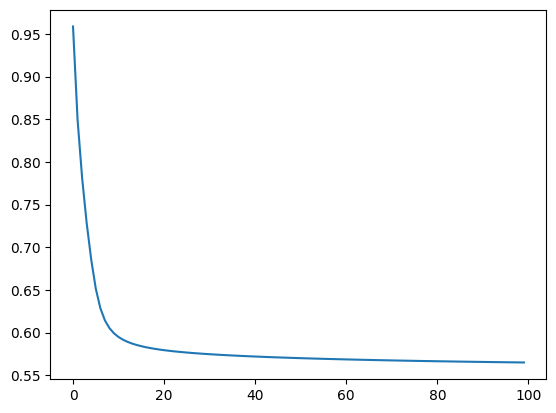

In [13]:
# Training loop
num_epochs = 1000
loss_values=[]
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    # Backward and optimize

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        loss_values.append(loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
#print(loss_values)
plt.plot(loss_values)
plt.show()


In [14]:
with torch.no_grad():
    y_pred = model(X_test)
    predicted = torch.argmax(y_pred, dim=1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.97


<ipython-input-11-5e75318d80b6>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [15]:
my_flower= np.array([[12,3,1,12]])
my_flower = torch.tensor(my_flower, dtype=torch.float32)
y_p= model(my_flower)
predicted = torch.argmax(y_p, dim=1)
print(predicted)

tensor([2])


<ipython-input-11-5e75318d80b6>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [16]:
X = iris.data[:, 2:] #select the last 2 columns (petal length  &  petal width )
y = iris.target

In [17]:
input_size = 2  # Number of features in Iris dataset
hidden_size = 8
output_size = 3  # Number of classes

# Create the model
model = MLP(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [18]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=141)

num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


<ipython-input-11-5e75318d80b6>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


Epoch [10/1000], Loss: 1.0666
Epoch [20/1000], Loss: 0.9905
Epoch [30/1000], Loss: 0.9617
Epoch [40/1000], Loss: 0.9247
Epoch [50/1000], Loss: 0.8866
Epoch [60/1000], Loss: 0.8540
Epoch [70/1000], Loss: 0.8279
Epoch [80/1000], Loss: 0.8063
Epoch [90/1000], Loss: 0.7871
Epoch [100/1000], Loss: 0.7681
Epoch [110/1000], Loss: 0.7486
Epoch [120/1000], Loss: 0.7289
Epoch [130/1000], Loss: 0.7097
Epoch [140/1000], Loss: 0.6922
Epoch [150/1000], Loss: 0.6770
Epoch [160/1000], Loss: 0.6644
Epoch [170/1000], Loss: 0.6540
Epoch [180/1000], Loss: 0.6456
Epoch [190/1000], Loss: 0.6388
Epoch [200/1000], Loss: 0.6332
Epoch [210/1000], Loss: 0.6285
Epoch [220/1000], Loss: 0.6245
Epoch [230/1000], Loss: 0.6211
Epoch [240/1000], Loss: 0.6181
Epoch [250/1000], Loss: 0.6156
Epoch [260/1000], Loss: 0.6132
Epoch [270/1000], Loss: 0.6112
Epoch [280/1000], Loss: 0.6093
Epoch [290/1000], Loss: 0.6076
Epoch [300/1000], Loss: 0.6060
Epoch [310/1000], Loss: 0.6045
Epoch [320/1000], Loss: 0.6032
Epoch [330/1000],

In [19]:
with torch.no_grad():
    y_pred = model(X_test)
    predicted = torch.argmax(y_pred, dim=1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


<ipython-input-11-5e75318d80b6>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [20]:
h = .02  # step size in the mesh
import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print(x_min, x_max, y_min, y_max)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

pp=np.c_[xx.ravel(), yy.ravel()]
outp= model(torch.tensor(pp, dtype=torch.float32))
Z =  torch.argmax(outp, dim=1)
Z = Z.reshape((xx.shape))

tensor(0.) tensor(7.9000) tensor(-0.9000) tensor(3.5000)


<ipython-input-11-5e75318d80b6>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


Text(0.5, 1.0, 'MLP Classifier')

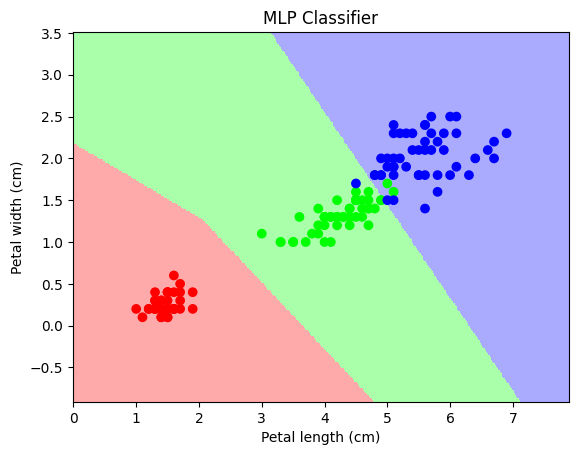

In [21]:

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Add training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title("MLP Classifier")